# Experiment Two

The first study, called `experiment-two`, looked at the effect of social influence on curiousity, using upvotes as proxy for social interest. Below we analyze the responses to test the hypothesis that the same questions, when given higher upvotes, receive higher scores from participants with regards to curiousity. And, further, whether this translates into participants being more likely to choose to view the answers to the questions with higher upvotes.

## Analysis

In [1]:
import sys
enc = sys.getdefaultencoding()

In [2]:
# Analytical Tools
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# General Utilities
import math
import json
import pprint
import itertools
import importlib

# Custom Utilities
import utilities.processing_two as processing
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
from IPython.display import Markdown, display
log = pprint.pprint
space = lambda: print()
printmd = lambda text: display(Markdown(text))
%matplotlib inline

C:\Users\RACH0_000\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.0.0' currently installed).
  warnings.warn(msg, UserWarning)


### Reading Data and Defining Constants

In [3]:
FILE_NAMES = [
    'raw-data/questions-and-answers-clean.json',
    'raw-data/judgments.json',
    'raw-data/responses-two.json'
]

NUM_QUESTIONS, NUM_JUDGEMENTS = 10, 7
GROUP_SIZE = NUM_QUESTIONS // 2

ALL_LABELS = processing.get_all_labels(NUM_QUESTIONS)
LOW_LABELS, HIGH_LABELS = ALL_LABELS[:GROUP_SIZE], ALL_LABELS[GROUP_SIZE:]
JUDGMENT_LABELS = processing.get_judgment_labels(NUM_JUDGEMENTS)

LITERALS = []
for name in FILE_NAMES[:2]:
    with open(name,"r", encoding = enc) as file:
         LITERALS.append(json.load(file))
with open(FILE_NAMES[2],"r", encoding = enc) as file:
    master_responses = [json.loads(line) for line in file if line]

### Reading Responses into Data
Creates a `DataFrame` based on the survey data.

In [4]:
col_labels = processing.get_col_labels(NUM_QUESTIONS,
                                       NUM_JUDGEMENTS)
data = {label: [] for label in col_labels}

In [5]:
processing.fill_experiment_three_data(data, master_responses)

In [6]:
data = pd.DataFrame(data)
data = data[data.consent == 1]
sample_size = len(data)
print(data.size, sample_size)
data.head()

30401 301


,consent,high_q0_choice,high_q0_index,high_q0_j0,high_q0_j1,high_q0_j2,high_q0_j3,high_q0_j4,high_q0_j5,high_q0_j6,...,low_q4_choice,low_q4_index,low_q4_j0,low_q4_j1,low_q4_j2,low_q4_j3,low_q4_j4,low_q4_j5,low_q4_j6,low_q4_score
0,1,1,38,3,3,2,1,3,4,2,...,0,12,4,3,4,2,3,3,1,31
1,1,0,21,3,3,3,3,3,3,4,...,1,10,3,3,3,3,3,4,3,33
2,1,1,31,4,1,3,3,5,2,2,...,1,0,2,2,3,3,3,1,2,22
3,1,0,41,4,4,1,4,4,3,2,...,1,15,2,1,4,4,1,3,3,18
4,1,1,37,3,3,4,4,3,1,2,...,0,18,3,4,4,3,3,2,3,30


### Examining Participants Without Variance

New we consider elimating participants with little to no variance to determine if this had any noticable effect on our results. For example, particpant number two in our study had a variance of 0.2, meaning nearly ever response he or she gave was 3; we remove all such particpants and test for significance in the same way.

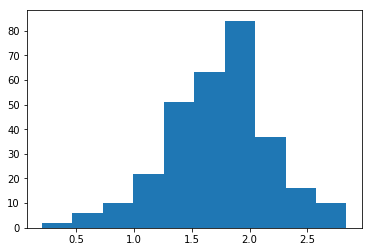

In [9]:
all_judgment_headers = ['{}_{}'.format(q_label, j_label) for 
                        q_label, j_label in itertools.product(
                            ALL_LABELS, JUDGMENT_LABELS)]
data['total_var'] = data[all_judgment_headers].std(axis=1)
plt.hist(data['total_var'])
plt.show()

In [8]:
data = data[data.total_var > 0.75]
print('{} eliminated'.format(sample_size - len(data)))

9 eliminated


### Simple T-Tests
We first attempt to replicate the results of the first experiment by once again conducting a paired samples t-test.

In [7]:
# Update the table with intermediate values
low_means, low_err = [], []
high_means, high_err = [], []
sample_size = len(data)

for j_label in JUDGMENT_LABELS:
    low_headers = ['{}_{}'.format(q_label, j_label) for q_label in LOW_LABELS]
    high_headers = ['{}_{}'.format(q_label, j_label) for q_label in HIGH_LABELS]
    low_data = data[low_headers].mean(axis=1)
    high_data = data[high_headers].mean(axis=1)
    
    data['{}_low'.format(j_label)] = low_data
    data['{}_high'.format(j_label)] = high_data
    data['{}_diff'.format(j_label)] = high_data - low_data
    
    low_means.append(low_data.mean())
    low_err.append(low_data.std() / math.sqrt(sample_size))
    high_means.append(high_data.mean())
    high_err.append(high_data.std() / math.sqrt(sample_size))

C:\Users\RACH0_000\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.4.6' currently installed).
  warnings.warn(msg, UserWarning)


Curiosity: t = -6.7, p = 1.03e-10 (1 greater)
Confidence: t = 0.0618, p = 0.951 (0 greater)
Usefulness: t = -4.85, p = 1.95e-06 (1 greater)
Popularity: t = -22.3, p = 1.42e-65 (1 greater)
Writing: t = -5.55, p = 6.2e-08 (1 greater)
Surprise: t = -6.45, p = 4.37e-10 (1 greater)
Social Utility: t = -6.37, p = 7.21e-10 (1 greater)


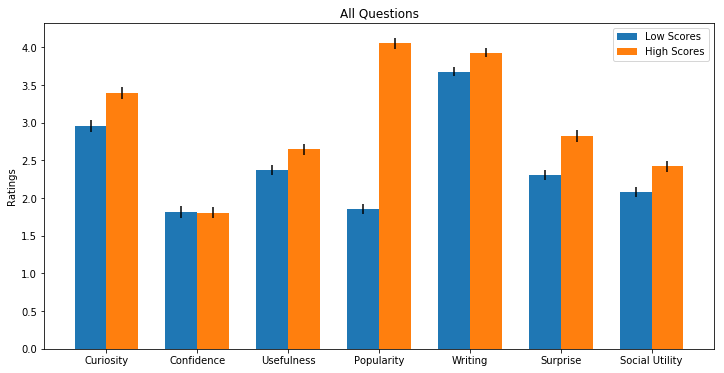

[0.44451827242524944, -0.0033222591362123133, 0.27574750830564776, 2.1986710963455156, 0.24916943521594703, 0.5122923588039869, 0.3395348837209302]


In [8]:
# Compute averages, run t-test and plot
PLOTTING_OPTIONS = {
    'y_label': 'Ratings',
    'ticks': ['Curiosity', 'Confidence', 'Usefulness',
              'Popularity', 'Writing', 'Surprise', 'Social Utility'],
    'legend': ['Low Scores', 'High Scores'],
    'title': 'All Questions',
    'size': (12, 6)
}

for index, j_label in enumerate(JUDGMENT_LABELS):
    low_data = data['{}_low'.format(j_label)]
    high_data = data['{}_high'.format(j_label)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][index],
                          describe.paired_t_test(low_data, high_data)))
    
plotting.plot_double_bar(low_means, low_err, high_means,
                         high_err, **PLOTTING_OPTIONS)

c = [a_i - b_i for a_i, b_i in zip(high_means, low_means)]
print(c)

In [9]:
print('Curiosity Effect Size')
print(high_means[0] - low_means[0])

Curiosity Effect Size
0.44451827242524944


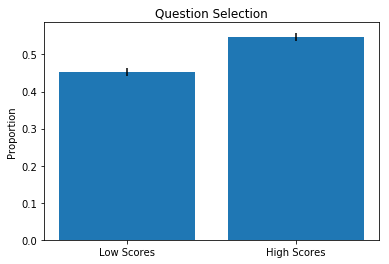

0.5475083056478406
t = 4.25, p = 2.87e-05 (greater)
Effect size: 0.09501661129568117


In [10]:
PLOTTING_OPTIONS = {
    'y_label': 'Proportion',
    'ticks': ['Low Scores', 'High Scores'],
    'title': 'Question Selection'
}

low_choice_labels = ['{}_choice'.format(q_label) for q_label in LOW_LABELS]
high_choice_labels = ['{}_choice'.format(q_label) for q_label in HIGH_LABELS]
low_choice_means = data[low_choice_labels].mean(axis=1)
high_choice_means = data[high_choice_labels].mean(axis=1)
data['low_choice'] = low_choice_means
data['high_choice'] = high_choice_means
low_mean = low_choice_means.mean()
high_mean = high_choice_means.mean()

plotting.plot_single_bar(
    [low_mean, high_mean],
    [low_choice_means.std() / math.sqrt(sample_size),
    high_choice_means.std() / math.sqrt(sample_size)],
    **PLOTTING_OPTIONS)

print(high_choice_means.mean())
print(describe.one_sample_t_test(high_choice_means, 0.5))
print('Effect size: {}'.format(high_mean - low_mean))

### Mediation Analysis

In [17]:
# Aggreate all questions and choice
columns = [
    'votes', 'curiosity', 'confidence', 'usefulness', 'popularity',
    'writing', 'surprise', 'social_utility', 'choice']
flattened_data = {col: [] for col in columns}

for index, row in data.iterrows():
    for q_label in ALL_LABELS:
        level = 1 if row['{}_score'.format(q_label)] > 240.9 else 0
        flattened_data[columns[0]].append(level)
        flattened_data[columns[1]].append(row['{}_j0'.format(q_label)])
        flattened_data[columns[2]].append(row['{}_j1'.format(q_label)])
        flattened_data[columns[3]].append(row['{}_j2'.format(q_label)])
        flattened_data[columns[4]].append(row['{}_j3'.format(q_label)])
        flattened_data[columns[5]].append(row['{}_j4'.format(q_label)])
        flattened_data[columns[6]].append(row['{}_j5'.format(q_label)])
        flattened_data[columns[7]].append(row['{}_j6'.format(q_label)])
        flattened_data[columns[8]].append(row['{}_choice'.format(q_label)])

In [18]:
new_data = pd.DataFrame(flattened_data)
new_data.head()

,choice,confidence,curiosity,popularity,social_utility,surprise,usefulness,votes,writing
0,1.0,4.0,4.0,5.0,2.0,2.0,3.0,0,2.0
1,1.0,2.0,4.0,2.0,1.0,5.0,4.0,0,4.0
2,0.0,2.0,4.0,5.0,1.0,4.0,2.0,0,2.0
3,0.0,2.0,4.0,5.0,4.0,3.0,4.0,0,2.0
4,0.0,3.0,4.0,2.0,1.0,3.0,4.0,0,3.0


In [19]:
all_predictors = [
    'curiosity', 'confidence', 'usefulness', 'popularity',
    'surprise', 'social_utility'
]
X = new_data[all_predictors]
y = new_data['choice']
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
results = logit_model.fit()
display(results.summary())



C:\Users\RACH0_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.621919
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                 3010
Model:                          Logit   Df Residuals:                     3003
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  0.1028
Time:                        18:05:16   Log-Likelihood:                -1872.0
converged:                       True   LL-Null:                       -2086.4
Covariance Type:            nonrobust   LLR p-value:                 1.794e-89
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1432      0.105    -10.926      0.000      -1.348      -0.938
curiosity          0.3400      0.027     12.735      0.000       0.288       0.392
confidence        -0.0995      0.023     -4.363      0.000      -0.144      -0.055
usefulness         0.0663      0.033      2.023      0.043       0.002       0.131
popularity         0.0307      0.022      1.387      0.165      -0.013       0.074
surprise          -0.0430      0.022     -1.996      0.046      -0.085      -0.001
social_utility     0.0400      0.032      1.231      0.218      -0.024       0.104
==================================================================================
"""

In [20]:
# Popularity
X = new_data['votes']
y = new_data['choice']
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
results = logit_model.fit()
display(results.summary())

# Curiosity
X = new_data['curiosity']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
results = logit_model.fit()
display(results.summary())

# Both
X = new_data[['votes', 'curiosity']]
X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
results = logit_model.fit()
display(results.summary())

Optimization terminated successfully.
         Current function value: 0.688626
         Iterations 4


C:\Users\RACH0_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                 3010
Model:                          Logit   Df Residuals:                     3008
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                0.006522
Time:                        18:05:19   Log-Likelihood:                -2072.8
converged:                       True   LL-Null:                       -2086.4
Covariance Type:            nonrobust   LLR p-value:                 1.820e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1906      0.052     -3.681      0.000      -0.292      -0.089
votes          0.3812      0.073      5.205      0.000       0.238       0.525
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.626993
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                 3010
Model:                          Logit   Df Residuals:                     3008
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.09544
Time:                        18:05:19   Log-Likelihood:                -1887.2
converged:                       True   LL-Null:                       -2086.4
Covariance Type:            nonrobust   LLR p-value:                 1.326e-88
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2761      0.079    -16.083      0.000      -1.432      -1.121
curiosity      0.3992      0.021     18.677      0.000       0.357       0.441
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.625291
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 choice   No. Observations:                 3010
Model:                          Logit   Df Residuals:                     3007
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                 0.09790
Time:                        18:05:19   Log-Likelihood:                -1882.1
converged:                       True   LL-Null:                       -2086.4
Covariance Type:            nonrobust   LLR p-value:                 1.983e-89
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3823      0.087    -15.953      0.000      -1.552      -1.212
votes          0.2508      0.078      3.201      0.001       0.097       0.404
curiosity      0.3932      0.021     18.329      0.000       0.351       0.435
==============================================================================
"""

In [21]:
# Mediation of curiosity
y = new_data['curiosity']
X = new_data['popularity']
X = sm.add_constant(X)

linear_model = sm.OLS(y, X)
results = linear_model.fit()
predictions = results.predict(X)
display(results.summary())

for mechanism in ('usefulness', 'surprise', 'social_utility'):
    X = new_data[[mechanism, 'popularity']]
    X = sm.add_constant(X)

    linear_model = sm.OLS(y, X)
    results = linear_model.fit()
    predictions = results.predict(X)
    display(results.summary())

C:\Users\RACH0_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              curiosity   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     341.6
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.54e-72
Time:                        18:05:23   Log-Likelihood:                -6115.2
No. Observations:                3010   AIC:                         1.223e+04
Df Residuals:                    3008   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2359      0.061     36.633      0.000       2.116       2.356
popularity     0.3188      0.017     18.481      0.000       0.285       0.353
==============================================================================
Omnibus:                      220.130   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.936
Skew:                          -0.245   Prob(JB):                     3.28e-22
Kurtosis:                       2.259   Cond. No.                         6.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              curiosity   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          4.98e-300
Time:                        18:05:23   Log-Likelihood:                -5587.2
No. Observations:                3010   AIC:                         1.118e+04
Df Residuals:                    3007   BIC:                         1.120e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2859      0.058     22.257      0.000       1.173       1.399
usefulness     0.5818      0.016     35.548      0.000       0.550       0.614
popularity     0.1460      0.015      9.558      0.000       0.116       0.176
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.279
Skew:                           0.071   Prob(JB):                      0.00966
Kurtosis:                       3.233   Cond. No.                         9.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              curiosity   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           9.09e-74
Time:                        18:05:23   Log-Likelihood:                -6108.8
No. Observations:                3010   AIC:                         1.222e+04
Df Residuals:                    3007   BIC:                         1.224e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0887      0.073     28.479      0.000       1.945       2.233
surprise       0.0644      0.018      3.603      0.000       0.029       0.099
popularity     0.3127      0.017     18.070      0.000       0.279       0.347
==============================================================================
Omnibus:                      214.573   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.346
Skew:                          -0.262   Prob(JB):                     9.84e-23
Kurtosis:                       2.270   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              curiosity   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     644.7
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          1.03e-233
Time:                        18:05:23   Log-Likelihood:                -5740.1
No. Observations:                3010   AIC:                         1.149e+04
Df Residuals:                    3007   BIC:                         1.150e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5289      0.059     25.873      0.000       1.413       1.645
social_utility     0.5277      0.018     29.176      0.000       0.492       0.563
popularity         0.1558      0.016      9.605      0.000       0.124       0.188
==============================================================================
Omnibus:                        6.028   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.862
Skew:                           0.084   Prob(JB):                       0.0533
Kurtosis:                       2.863   Cond. No.                         8.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
for output in all_predictors:
    
    # print(results.summary())

SyntaxError: unexpected EOF while parsing (<ipython-input-17-bb66d8f0429b>, line 3)

### Saving Results

In [ ]:
data.to_pickle('exp_two_responses.pkl')
new_data.to_pickle('exp_two_model.pkl')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])